<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Advanced_Optimizers_Full_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Optimizer Research Visualization
Includes:
- SGD, Momentum, NAG, Adagrad
- Convergence comparison
- 3D loss surface
- Learning rate instability demo
- Sharp vs Flat minima
- Sparse gradient example (Adagrad advantage)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


In [2]:
# Base quadratic loss surface
def loss_function(w):
    x, y = w
    return 0.5 * (x**2 + 10*y**2)

def gradient(w):
    x, y = w
    return np.array([x, 10*y])

In [3]:
# Optimizers
def sgd(lr=0.1, epochs=100):
    w = np.array([8.0, 8.0])
    traj=[w.copy()]
    for _ in range(epochs):
        w -= lr*gradient(w)
        traj.append(w.copy())
    return np.array(traj)

def momentum(lr=0.1, beta=0.9, epochs=100):
    w=np.array([8.0,8.0]); v=np.zeros(2); traj=[w.copy()]
    for _ in range(epochs):
        v=beta*v+lr*gradient(w)
        w-=v
        traj.append(w.copy())
    return np.array(traj)

def nag(lr=0.1, beta=0.9, epochs=100):
    w=np.array([8.0,8.0]); v=np.zeros(2); traj=[w.copy()]
    for _ in range(epochs):
        look=w-beta*v
        v=beta*v+lr*gradient(look)
        w-=v
        traj.append(w.copy())
    return np.array(traj)

def adagrad(lr=1.0, epochs=100, eps=1e-8):
    w=np.array([8.0,8.0]); G=np.zeros(2); traj=[w.copy()]
    for _ in range(epochs):
        g=gradient(w)
        G+=g**2
        w-=lr*g/(np.sqrt(G)+eps)
        traj.append(w.copy())
    return np.array(traj)

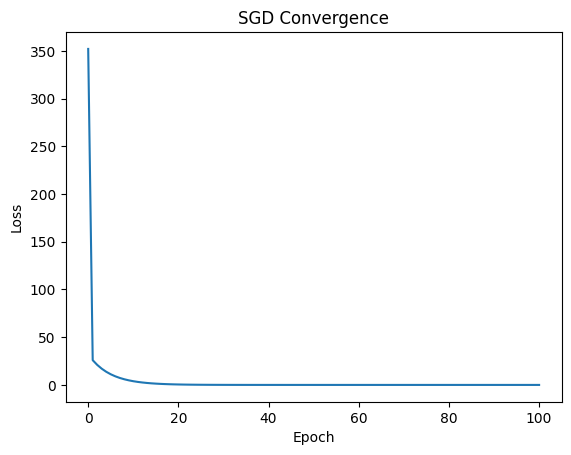

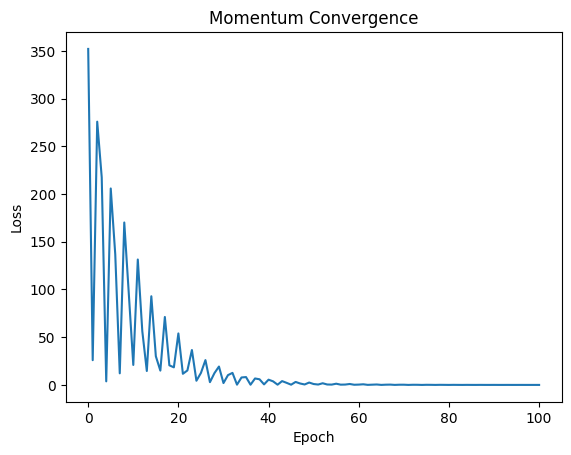

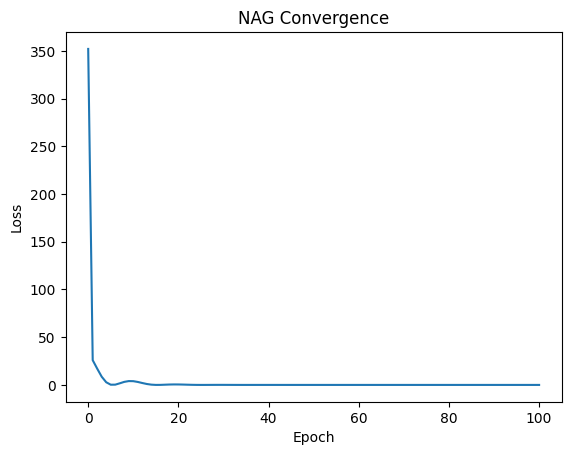

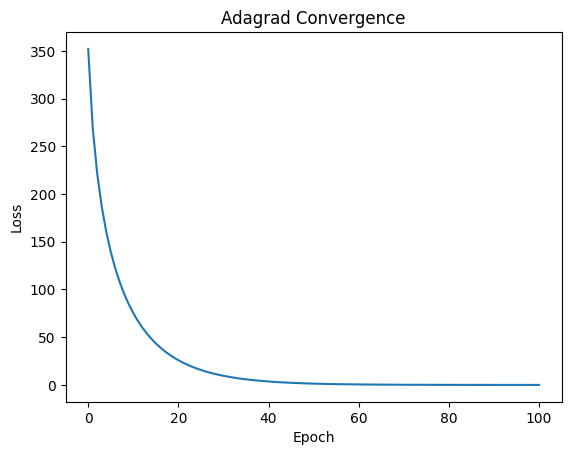

In [4]:
# Convergence plots (separate figures)
for name,opt in [('SGD',sgd),('Momentum',momentum),('NAG',nag),('Adagrad',adagrad)]:
    traj=opt()
    losses=[loss_function(w) for w in traj]
    plt.figure()
    plt.plot(losses)
    plt.title(name+' Convergence')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

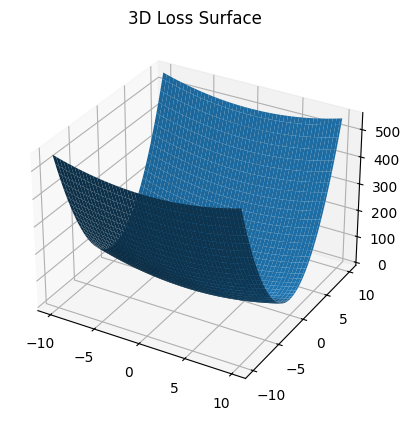

In [5]:
# 3D Loss Surface
x=np.linspace(-10,10,100)
y=np.linspace(-10,10,100)
X,Y=np.meshgrid(x,y)
Z=0.5*(X**2+10*Y**2)
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z)
ax.set_title('3D Loss Surface')
plt.show()

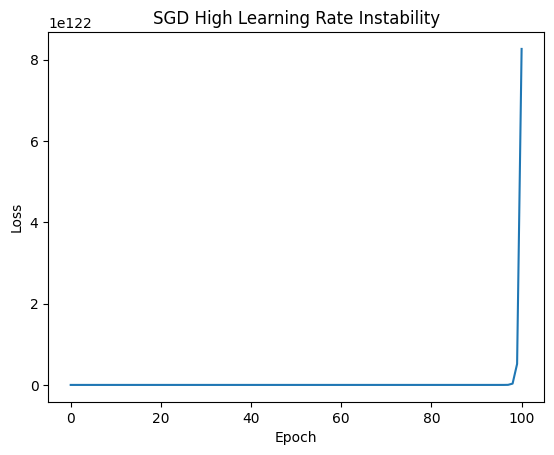

In [6]:
# Learning rate instability demo
traj=sgd(lr=0.5)
losses=[loss_function(w) for w in traj]
plt.figure()
plt.plot(losses)
plt.title('SGD High Learning Rate Instability')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

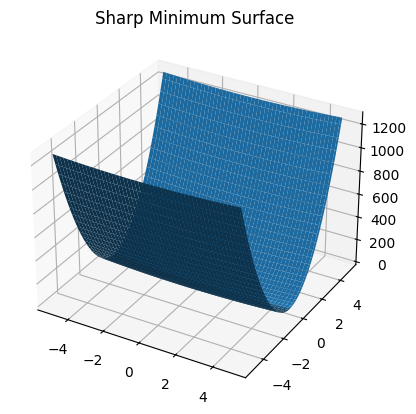

In [7]:
# Sharp vs Flat minima comparison (separate surface)
x=np.linspace(-5,5,100)
y=np.linspace(-5,5,100)
X,Y=np.meshgrid(x,y)
Z_sharp=X**2+50*Y**2
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z_sharp)
ax.set_title('Sharp Minimum Surface')
plt.show()

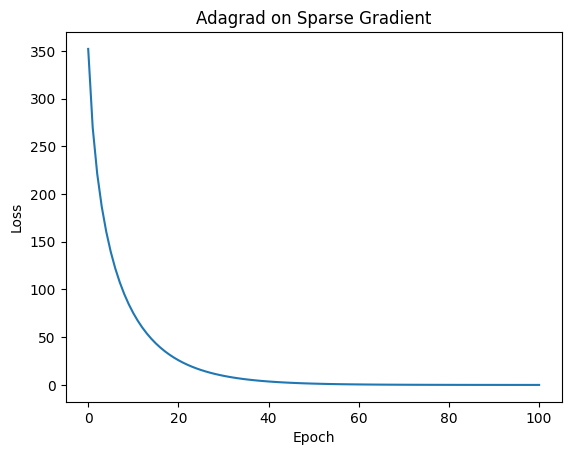

In [8]:
# Sparse gradient example (Adagrad shines)
def sparse_grad(w):
    return np.array([w[0], 0.01*w[1]])

def adagrad_sparse(lr=1.0,epochs=100):
    w=np.array([8.0,8.0]); G=np.zeros(2); traj=[w.copy()]
    for _ in range(epochs):
        g=sparse_grad(w)
        G+=g**2
        w-=lr*g/(np.sqrt(G)+1e-8)
        traj.append(w.copy())
    return np.array(traj)

traj=adagrad_sparse()
losses=[loss_function(w) for w in traj]
plt.figure()
plt.plot(losses)
plt.title('Adagrad on Sparse Gradient')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()